<b> Cervival Cancer risk classification

- <b> Import Library

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import RandomOverSampler

- <b> Data Cleaning

In [72]:
df = pd.read_csv("cervical.csv")
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [75]:
# remove all stds column (too much na value)
df1 = df.iloc[:, :12]
df2 = df.iloc[:, -4:]

df = pd.concat([df1, df2], axis="columns")
df = df.replace([np.inf, -np.inf], np.nan)
df.fillna(0, inplace=True)

In [76]:
# convert df to int
df = df.apply(pd.to_numeric, errors='coerce')
df = df.astype(int)
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,0,0,0,0,0,0
2,34,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,0,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3,18,0,0,0,0,0,0,0,0,0,0,0,0,0
854,32,2,19,1,0,0,0,1,8,0,0,0,0,0,0,0
855,25,2,17,0,0,0,0,1,0,0,0,0,0,0,1,0
856,33,2,24,2,0,0,0,1,0,0,0,0,0,0,0,0


In [78]:
# Features selection (10 best correlation)
corr = df.corr()['Biopsy'].abs().sort_values(ascending=False)

k = 10
selected_features = corr[1:k+1].index.tolist()

new_df = df[selected_features + ['Biopsy']]

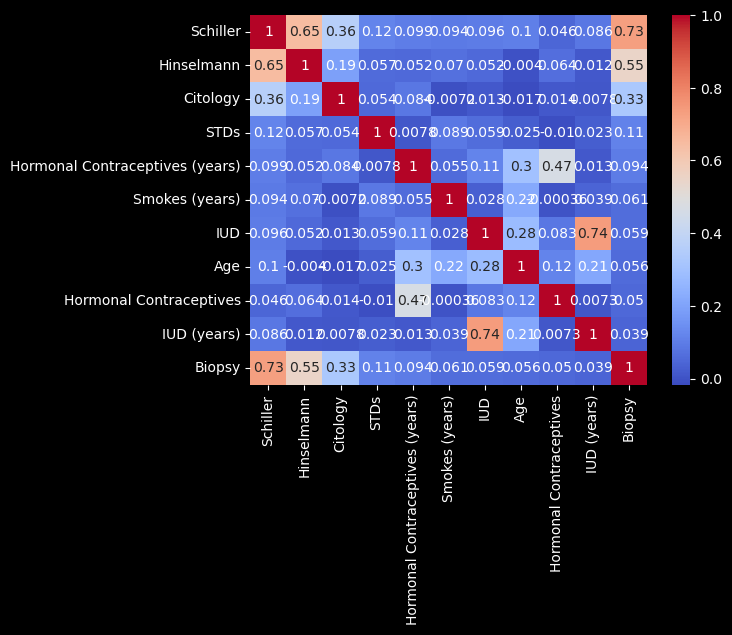

In [79]:
# correlation matrix
corr = new_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

- <b> imbalance handling SMOTE

In [80]:
X = new_df.drop(['Biopsy'], axis="columns")
y = new_df['Biopsy']

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

print("Before oversampling: ")
print(y.value_counts())

print("After oversampling: ")
print(y_resampled.value_counts())

Before oversampling: 
0    803
1     55
Name: Biopsy, dtype: int64
After oversampling: 
0    803
1    803
Name: Biopsy, dtype: int64


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=64)

- <b> Logistic regression model

In [82]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear']
}

lr = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='roc_auc')

grid_search.fit(X_resampled, y_resampled)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best score:  0.9575909253115235


c:\Users\hilla\anaconda3\envs\machine\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hilla\anaconda3\envs\machine\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hilla\anaconda3\envs\machine\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\hilla\anaconda3\envs\machine\lib\site-packages\sklearn\linear_model\_logistic.py", l

In [83]:
regression = LogisticRegression(C=1, penalty='l2', solver='liblinear')
regression.fit(X_train, y_train)
regression.score(X_test, y_test)

0.9107883817427386

In [84]:
print(classification_report(y_test, regression.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       228
           1       0.96      0.87      0.91       254

    accuracy                           0.91       482
   macro avg       0.91      0.91      0.91       482
weighted avg       0.92      0.91      0.91       482



- <b> pickling logistic regression

In [85]:
with open('regression.pkl', 'wb') as f:
    pickle.dump(regression, f)

In [113]:
X_test.head()

,Schiller,Hinselmann,Citology,STDs,Hormonal Contraceptives (years),Smokes (years),IUD,Age,Hormonal Contraceptives,IUD (years)
1314,0,0,0,0,3,0,0,21,1,0
203,1,1,0,1,0,0,1,28,1,3
1552,0,0,0,0,3,0,0,28,1,0
639,0,0,0,0,0,0,0,17,0,0
1066,0,0,0,0,0,3,0,20,1,0


In [114]:
y_test.head()

1314    1
203     1
1552    1
639     0
1066    1
Name: Biopsy, dtype: int32